In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from keras.models import Model
from keras.layers import Input, concatenate, Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization

from keras import backend as K
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras_preprocessing import image
from keras.regularizers import Regularizer
import numpy as np

import pandas as pd
import sys
import json
import os
import sklearn.metrics as metrics
import keras.callbacks as callbacks
import keras.utils.np_utils as kutils
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import keras

In [2]:
Image_size = [224,224]

In [3]:
train_path = '/content/drive/MyDrive/Dataset/train'
test_path = '/content/drive/MyDrive/Dataset/test'
val_path = '/content/drive/MyDrive/Dataset/val'

In [4]:
import seaborn as sns
from glob import  glob

In [5]:

# Use the Image Data Generator to import the images from the dataset
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [6]:
train_set = train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 5216 images belonging to 2 classes.


In [7]:
normal = [img for img in glob('/content/drive/MyDrive/Dataset/train/NORMAL/*')]


In [8]:
for i in normal[0:5]:
  im = plt.imread(i)
  plt.figure(figsize=(15,20))
  plt.title('Normal',color='green',size=14)
  plt.imshow(im)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [9]:
pnemonia = [img for img in glob('/content/drive/MyDrive/Dataset/train/PNEUMONIA/*')]


In [10]:
for i in pnemonia[0:5]:
  im = plt.imread(i)
  plt.figure(figsize=(15,20))
  plt.title('Pneumonia',color='green',size=14)
  plt.imshow(im)
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [11]:

vgg16 = VGG16(input_shape=Image_size+[3], weights='imagenet',include_top=False)

In [12]:
for layer in vgg16.layers:
  layer.trainable = False

In [13]:
x = Flatten()(vgg16.output)
x = Flatten()(x)
x = Dense(2024,activation='relu')(x)

In [14]:
prediction = Dense(2,activation='softmax')(x)

In [15]:
model = Model(inputs=vgg16.input, outputs = prediction)


In [16]:
model.summary(
    
)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [17]:
from keras.optimizers import Adam



In [18]:
adam = Adam(learning_rate=0.001)

In [19]:
model.compile(optimizer=adam,loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [21]:
test_datagen = ImageDataGenerator(rescale= 1/255.0)

In [22]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/train',target_size=(224,224),class_mode='categorical',batch_size=32)

Found 5216 images belonging to 2 classes.


In [23]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Dataset/test',target_size=(224,224),class_mode='categorical',batch_size=32)

Found 624 images belonging to 2 classes.


In [24]:


hist = model.fit_generator(train_set,steps_per_epoch=len(train_set),epochs=3,verbose=1
                           , validation_data=test_set,validation_steps=len(test_set))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/3
163/163 [==============================] - 2692s 17s/step - loss: 1.9621 - accuracy: 0.8491 - val_loss: 0.3099 - val_accuracy: 0.8878
Epoch 2/3
163/163 [==============================] - 2682s 16s/step - loss: 0.1835 - accuracy: 0.9448 - val_loss: 0.3540 - val_accuracy: 0.8942
Epoch 3/3
163/163 [==============================] - 2684s 16s/step - loss: 0.1033 - accuracy: 0.9678 - val_loss: 0.3345 - val_accuracy: 0.9054


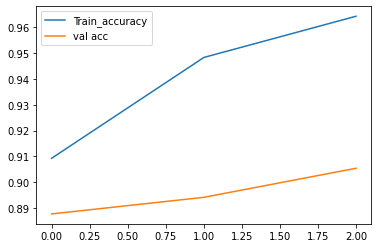

In [26]:
plt.plot(hist.history['accuracy']  ,label = 'Train_accuracy')
plt.plot(hist.history['val_accuracy'], label='val acc')
plt.legend()
plt.show
plt.savefig('Training score acc')

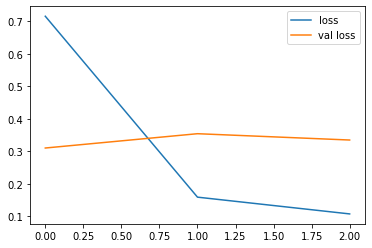

In [27]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'] ,label='val loss')
plt.legend()
plt.show
plt.savefig('Training loss val')


In [28]:
from keras.models import load_model

In [30]:
model.save('Model_Vgg16.h5')

Validatation 

In [31]:
model = load_model('Model_Vgg16.h5')

In [32]:
img = image.load_img('/content/drive/MyDrive/Dataset/val/PNEUMONIA/person1946_bacteria_4874.jpeg',target_size=(224,224))

In [33]:
x = image.img_to_array(img)

In [34]:
x = np.expand_dims(x, axis=0)
from keras.applications.vgg16 import preprocess_input

In [35]:
imag = preprocess_input(x)

In [36]:
classes = model.predict(imag)

In [57]:
print(classes)

[[0. 1.]]


In [69]:
img = image.load_img('/content/drive/MyDrive/Dataset/val/NORMAL/NORMAL2-IM-1436-0001.jpeg',target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
imag = preprocess_input(x)
classes = model.predict(imag)
print(classes)

[[1.0000000e+00 1.2498515e-33]]
